In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f

# Step 1: Load the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

# Step 2: Train a Model
X = data.drop("quality", axis=1)
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

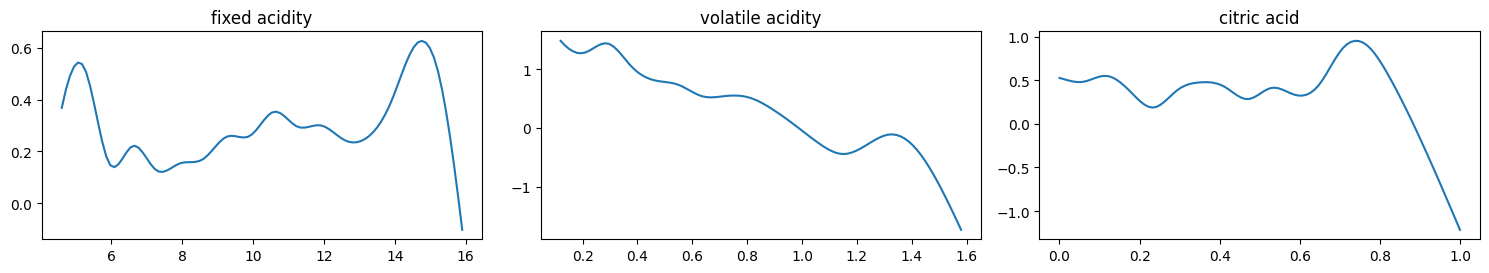

In [4]:
# Step 4: Apply GAM
gam = LinearGAM(s(0) + s(1)+ s(2)+ s(3)+ s(4)+ s(5)).fit(X_train, y_train)
xxs = []
# Plot GAM
plt.figure(figsize=(15, 10))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(4, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    xxs.append(XX)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.title(data.columns[term.feature])
plt.tight_layout()
plt.show()

In [9]:
xxs[0].shape

(100, 11)

In [8]:
xxs[1].shape

(100, 11)